<a href="https://colab.research.google.com/github/kishore145/AI-ML-Foundations/blob/master/01_shallow_net_in_tensorfow_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all dependencies
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

import numpy as np

In [0]:
# Donwload mnist data - collection of labelled images of handwritten numbers
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
# Check the shape of the data to ensure data is downloaded correctly
print(f'''
X_train shape: {X_train.shape},
y_train shape: {y_train.shape},
X_valid shape: {X_valid.shape},
y_valid shape: {y_valid.shape}''')


X_train shape: (60000, 28, 28),
y_train shape: (60000,),
X_valid shape: (10000, 28, 28),
y_valid shape: (10000,)


[5 0 4 1 9 2 1 3 1 4 3 5]


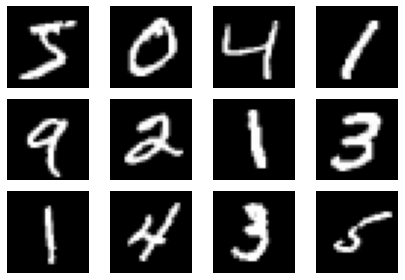

In [4]:
# view subset of data for review
print(y_train[0:12])
for k in range(0,12):
  plt.subplot(3,4,k+1)
  plt.imshow(X_train[k], cmap='gray', vmin=0, vmax=255)
  plt.axis(False)
plt.tight_layout()
plt.show()

7


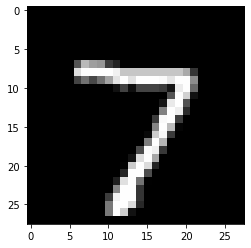

In [5]:
# Review one sample y_valid data set
print(y_valid[0])
plt.imshow(X_valid[0], cmap = 'gray')

In [6]:
# Data pre-processing steps
# Flatten training data / Features from (60000, 28, 28) to (60000, 784) for feeding into ANN
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

# Do min max scaling on Feature set to normalize the data
X_train /= 255.
X_valid /= 255.

# Convert Labels y_train and y_valid to categorical variables using one hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes = num_classes)
y_valid = to_categorical(y_valid, num_classes = num_classes)

# Review the revised shape of feature vector and target labels
print(f'''
X_train shape : {X_train.shape},
X_valid shape : {X_valid.shape},
y_train shape : {y_train.shape},
y_valid shape : {y_valid.shape} ''')


X_train shape : (60000, 784),
X_valid shape : (10000, 784),
y_train shape : (60000, 10),
y_valid shape : (10000, 10) 


In [7]:
# review one sample target data after one hot encoding
print(f'''
One hot encoded y_valid[0]  : {y_valid[0]},
Argmax (Index) of y_valid[0]: {np.argmax(y_valid[0])}''')


One hot encoded y_valid[0]  : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.],
Argmax (Index) of y_valid[0]: 7


In [0]:
# Define / Design Shallow Neural Net architecture
# Create Sequential model
model = Sequential()

# Add first dense layer
model.add(Dense(64, activation = 'sigmoid', input_shape = (784,))) # activation can be relu, tanh etc. 

# Add output layer with activation as softmax since we are doing a multi classification problem
model.add(Dense(10,activation='softmax'))


In [9]:
# Review model created
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
# How Number of parameters are calculated
# Param count for first dense layer = inpupt parameters (784) * number of neurons (64) + bias (64)
# Param count for output dense layer = number of neurons in last layer(64)* no of neurons in  o/p layer (10) + bias (10)
# Total parameter count = sum of parameter counts in each layer

print(f'''
Parameter count in first layer : {784*64 + 64},
Parameter count in o/p layer   : {64*10 + 10},
Total Parameter count          : {(784*64 + 64) + (64*10 + 10)}'''
)


Parameter count in first layer : 50240,
Parameter count in o/p layer   : 650,
Total Parameter count          : 50890


In [0]:
# Configure / Compile  model - Providde optimizer to user, loss function and metrics 
# optimizer can be adam, nadam, SGD, etc and loss can be mean_squared_error, categorical_crossentropy as per regression/classification problem

model.compile(optimizer=SGD(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [12]:
# Fit the model with training data
model.fit(X_train, y_train, batch_size=128, epochs = 200, verbose = 1, validation_data=(X_valid, y_valid))

# Hyper Parameters configured explicitly till now in this notebook are : 
# 1. number of dense layer and neurons in each layer
# 2. activation function 
# 3. optimizer and learning rate
# 4. loss function
# 5. batch_size and epoch count

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 2.1041 - accuracy: 0.4581 - val_loss: 1.8458 - val_accuracy: 0.6784
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 1.6503 - accuracy: 0.7163 - val_loss: 1.4421 - val_accuracy: 0.7602
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 1.3025 - accuracy: 0.7711 - val_loss: 1.1458 - val_accuracy: 0.7996
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 1.0594 - accuracy: 0.8045 - val_loss: 0.9480 - val_accuracy: 0.8253
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.8973 - accuracy: 0.8244 - val_loss: 0.8158 - val_accuracy: 0.8413
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.7867 - accuracy: 0.8378 - val_loss: 0.7241 - val_accuracy: 0.8523
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.7080 - accuracy: 0.8479 - val_loss: 0.6574 - val_accuracy: 0.8597

In [13]:
# Evaluating model performance
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9471


[0.18117763102054596, 0.9470999836921692]

In [16]:
# Predict using trained model
X_valid_0 = X_valid[0].reshape(1,784)
y_pred = model.predict(X_valid_0)

print(f'Raw prediction using predict method : {y_pred}')
print(f'Taking raw np.argmax (Index)        : {np.argmax(y_pred)}')
#print(f'Using Pred class                    : {model.predict_classes(X_valid_0)}') #-- Deprecated
print(f'Taking np.argmax(predict, axis = -1): {np.argmax(model.predict(X_valid_0), axis=-1)}')


Raw prediction using predict method : [[3.6066845e-05 2.2649779e-06 2.7399600e-04 2.6663467e-03 9.9916792e-07
  5.8796057e-05 1.7561296e-08 9.9679911e-01 8.3152536e-06 1.5395205e-04]]
Taking raw np.argmax (Index)        : 7
Taking np.argmax(predict, axis = -1): [7]


In [0]:
# Concludes basic shallow neural network architecture. 